Chart generated successfully.


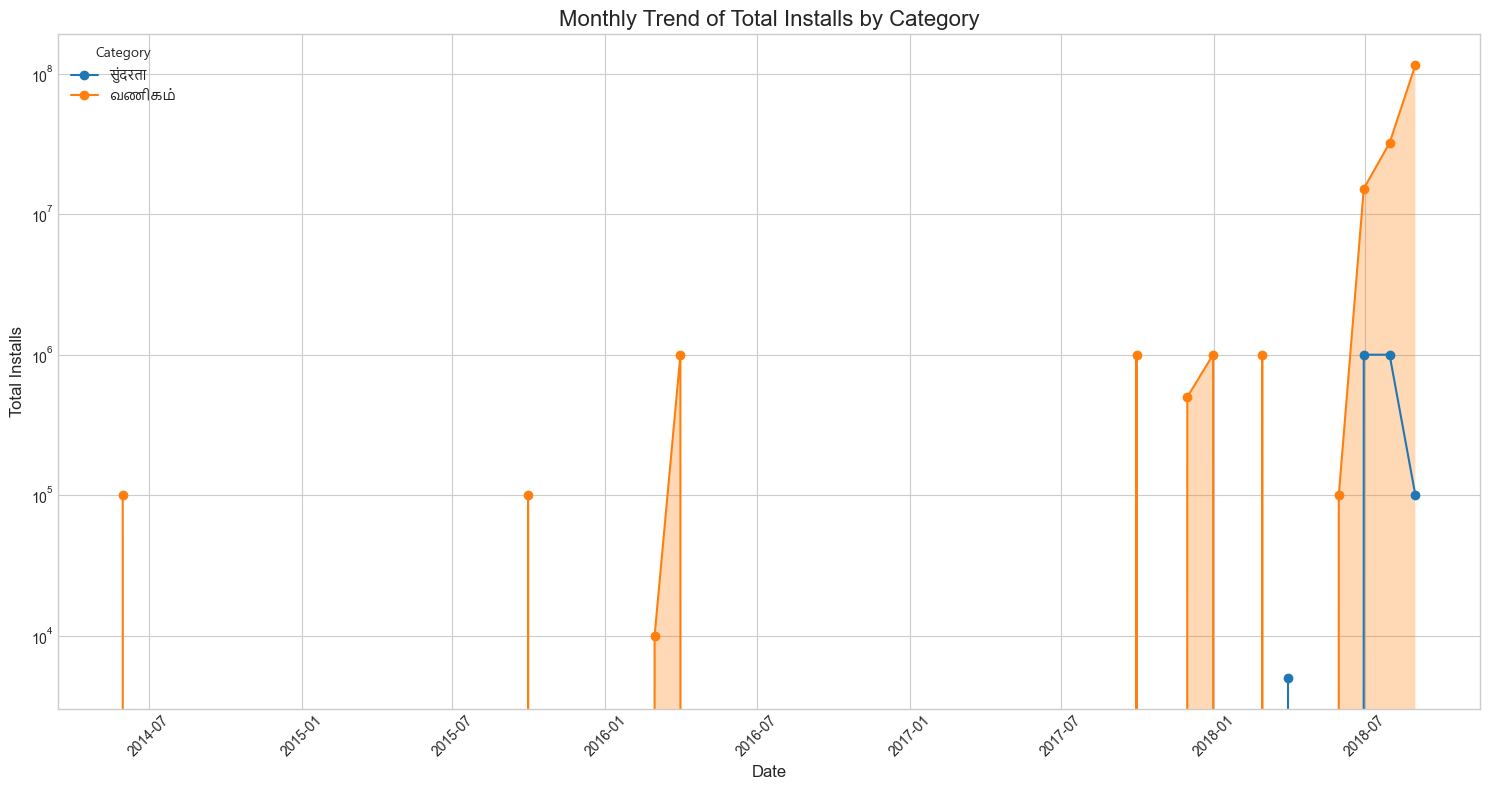

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import matplotlib.font_manager as fm

# --- Time Constraint Check ---
IST = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(IST)

if 18 <= now_ist.hour < 21:
    try:
        # --- Load and Clean Data ---
        df = pd.read_csv("C:/Users/SYED SAAD/Downloads/Play Store Data.csv")

        # (Data cleaning and filtering steps remain the same...)
        df['Installs'] = df['Installs'].str.replace('[,+]', '', regex=True)
        df = df[df['Installs'] != 'Free']
        df['Installs'] = pd.to_numeric(df['Installs'])
        df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
        df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
        df.dropna(subset=['Last Updated', 'Reviews', 'Category'], inplace=True)
        df = df[~df['App'].str.lower().str.startswith(('x', 'y', 'z'))]
        df = df[~df['App'].str.lower().str.contains('s')]
        df = df[df['Category'].str.startswith(('E', 'C', 'B'))]
        df = df[df['Reviews'] > 500]

        # --- Translations ---
        categories_to_plot = ['BEAUTY', 'BUSINESS']
        df_filtered = df[df['Category'].isin(categories_to_plot)].copy()
        translation_map = {
            'BEAUTY': 'सुंदरता',
            'BUSINESS': 'வணிகம்',
            'DATING': 'Dating'
        }
        df_filtered['Category'] = df_filtered['Category'].map(translation_map)
        df_filtered.dropna(subset=['Category'], inplace=True)

        # --- Time Series Aggregation (Corrected Line) ---
        if not df_filtered.empty:
            df_filtered.set_index('Last Updated', inplace=True)
            # Group by translated category and resample by month, summing installs
            time_series = df_filtered.groupby('Category')['Installs'].resample('ME').sum().unstack(0)

            # (The rest of the plotting code remains the same...)
            monthly_growth = time_series.pct_change()
            plt.style.use('seaborn-v0_8-whitegrid')
            fig, ax = plt.subplots(figsize=(15, 8))
            try:
                plt.rcParams['font.family'] = 'Nirmala UI'
            except:
                print("Warning: 'Nirmala UI' font not found.")
                plt.rcParams['font.family'] = 'sans-serif'
            for category in time_series.columns:
                ax.plot(time_series.index, time_series[category], label=category, marker='o', linestyle='-')
                growth_periods = monthly_growth.index[monthly_growth[category] > 0.20]
                ax.fill_between(time_series.index, 0, time_series[category],
                                where=time_series.index.isin(growth_periods),
                                facecolor=ax.get_lines()[-1].get_color(), alpha=0.3)
            ax.set_title('Monthly Trend of Total Installs by Category', fontsize=16)
            ax.set_xlabel('Date', fontsize=12)
            ax.set_ylabel('Total Installs', fontsize=12)
            ax.set_yscale('log')
            ax.legend(title='Category', fontsize=10)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig('installs_trend_by_category_corrected.png')
            print("Chart generated successfully.")
        else:
            print("No data available.")

    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Chart generation is only available between 6 PM and 9 PM IST.")